In [1]:
import cv2

from fer import FER

import matplotlib.pyplot as plt

import matplotlib.image as mpimg


In [13]:
# Input Image
input_image = cv2.imread("anjil.jpg")
emotion_detector = FER(mtcnn=True)
# Output image's information
result = emotion_detector.detect_emotions(input_image)


# Highlight Yellow Bounding Box around face


In [14]:
bounding_box = result[0]["box"] #store bounding box coordinates that were generated and stored in the `result` variable
emotions = result[0]["emotions"] #access `result` and start storing from it’s `0th` element of `”emotions”` key
cv2.rectangle(input_image,(bounding_box[0], bounding_box[1]),(bounding_box[0] + 
                                                              bounding_box[2], bounding_box[1] + bounding_box[3]),
              (255, 0, 0), 10,)

array([[[128, 147, 154],
        [126, 145, 152],
        [126, 145, 152],
        ...,
        [ 21,  62,  47],
        [ 31,  74,  59],
        [ 28,  71,  56]],

       [[127, 146, 153],
        [127, 146, 153],
        [127, 146, 153],
        ...,
        [ 21,  62,  47],
        [ 24,  67,  52],
        [ 30,  73,  58]],

       [[126, 145, 152],
        [127, 146, 153],
        [128, 147, 154],
        ...,
        [ 45,  85,  73],
        [ 38,  79,  64],
        [ 28,  69,  54]],

       ...,

       [[ 85,  98,  82],
        [ 76,  89,  73],
        [116, 129, 115],
        ...,
        [ 20,  32,  32],
        [ 23,  35,  35],
        [ 25,  37,  37]],

       [[ 88, 101,  87],
        [ 99, 112,  98],
        [ 94, 106,  94],
        ...,
        [ 20,  32,  34],
        [ 22,  34,  36],
        [ 23,  35,  37]],

       [[ 95, 108,  94],
        [143, 156, 142],
        [ 74,  85,  75],
        ...,
        [ 23,  35,  37],
        [ 21,  33,  35],
        [ 18,  30,  32]]

In [15]:
#Storing  the top emotion values in `emotion_name,score` variable by using `detector.top_emotion(img)` method.
emotion_name, score = emotion_detector.top_emotion(input_image) 

# iterate over the index and value of an item in a list by using a basic `for` loop and `enumerate` method. 
#So now 1 emotion is iterated at a given time. This process takes place 6 times as we have 6 emotions to test.
for index, (emotion_name, score) in enumerate(emotions.items()):
    color = (255, 0,0) if score < 0.01 else (0, 0, 0) #Colors are assigned to `color` variable based upon scores
    emotion_score = "{}: {}".format(emotion_name, "{:.2f}".format(score)) #stores the emotion score and will used to print
    
     #draw a text string on any image
    cv2.putText(input_image,emotion_score,(bounding_box[0], bounding_box[1] + bounding_box[3] + 30 + index * 15),
                cv2.FONT_HERSHEY_SIMPLEX,0.5,color,1,cv2.LINE_AA,)

#Save the result in new image file
cv2.imwrite("emotion.jpg", input_image)


True

# Display

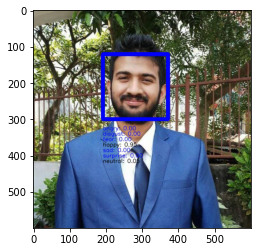

In [16]:
# Read image file using matplotlib's image module
result_image = mpimg.imread('emotion.jpg')
imgplot = plt.imshow(result_image)
# Display Output Image
plt.show()
